In [198]:
import os
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
from tqdm import tqdm

In [199]:
folder_path = "./csv_final_versions2/"
files = os.listdir(folder_path)
if '.DS_Store' in files:
        files.remove('.DS_Store')
files.sort()

for i, file in enumerate(files):
    if (i+2) < 10:
        file_name = "T_0" + str(i+2)
    else:
        file_name = "T_" + str(i+2)
    path = folder_path + file

    df = pd.read_csv(path)

    if i == 0:
        df_all = df.copy()
    else:
        df_all = pd.concat([df_all, df])

print(len(df_all))

df_all["tintin"] = 0
df_all["snowy"] = 0
df_all["haddock"] = 0
df_all["calculus"] = 0
df_all["t-t"] = 0

df_all.reset_index(inplace=True, drop=True)

for i in range(len(df_all)):
    if "tintin" in df_all["detected_chars"][i]:
        df_all["tintin"][i] = 1 
    if "snowy" in df_all["detected_chars"][i]:
        df_all["snowy"][i] = 1 
    if "haddock" in df_all["detected_chars"][i]:
        df_all["haddock"][i] = 1 
    if "calculus" in df_all["detected_chars"][i]:
        df_all["calculus"][i] = 1 
    if "t-t" in df_all["detected_chars"][i]:
        df_all["t-t"][i] = 1 


18146


/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_39686/2949655512.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["snowy"][i] = 1
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_39686/2949655512.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["tintin"][i] = 1
/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_39686/2949655512.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_al

In [200]:
df_all = df_all[['book', 'page', 'img', 'panel_area', 'panel_width', 'panel_length']]

In [201]:
df_all.head()

,book,page,img,panel_area,panel_width,panel_length
0,T_01,1,ROI_0.png,261626,514,509
1,T_01,1,ROI_1.png,260091,513,507
2,T_01,1,ROI_2.png,260084,514,506
3,T_01,1,ROI_3.png,258064,508,508
4,T_01,1,ROI_4.png,262144,512,512


In [202]:
df_all[['book', 'panel_area', 'panel_width', 'panel_length']].groupby('book').mean()

,panel_area,panel_width,panel_length
book,,,
T_01,312269.841069,615.241913,506.503516
T_02,340335.350453,586.225076,572.947130
T_03,389864.054167,622.808333,623.434722
T_04,329369.735108,557.789607,585.716096
T_05,283894.820829,479.659574,574.554311
T_06,279580.962712,484.209040,571.152542
T_07,367581.603113,596.080415,611.181582
T_08,174623.011348,402.360284,415.246809
T_09,338568.853793,553.725517,582.809655


<Axes: xlabel='book'>

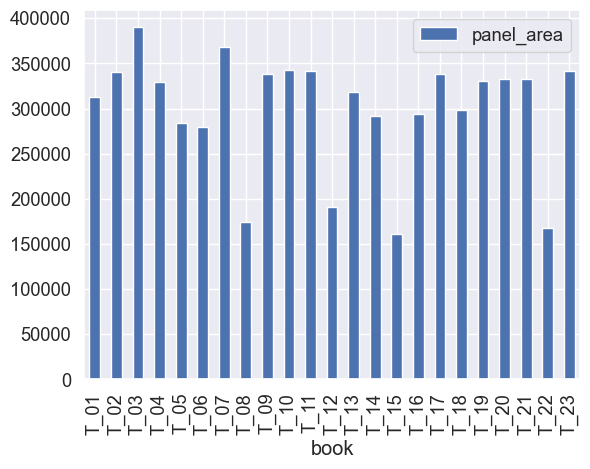

In [203]:
df_all[['book', 'panel_area']].groupby('book').mean().plot(kind='bar')

<Axes: xlabel='book', ylabel='panel_area'>

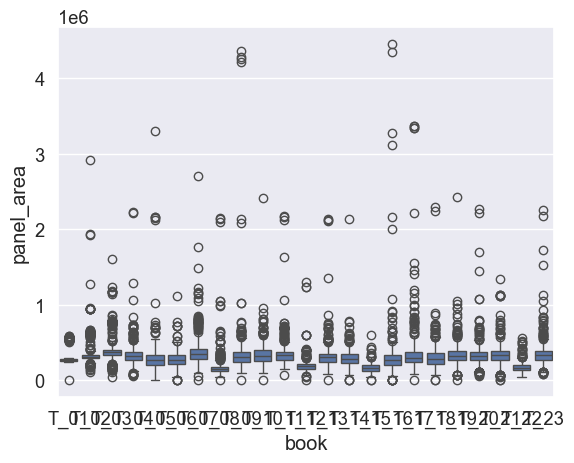

In [204]:
import seaborn as sns

sns.boxplot(x=df_all["book"], y=df_all["panel_area"])

<Axes: xlabel='book', ylabel='panel_area'>

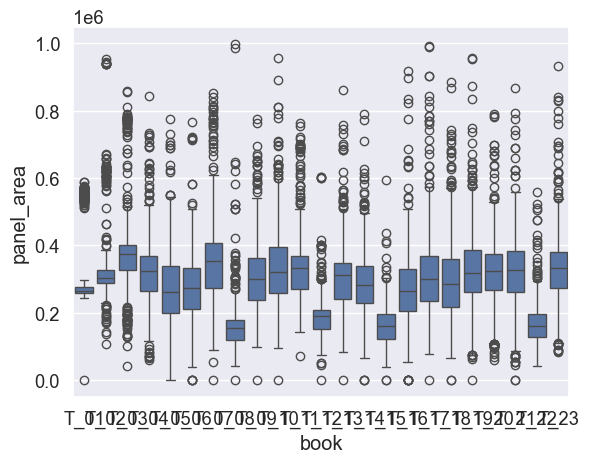

In [205]:
import seaborn as sns

sns.boxplot(x=df_all["book"], y=df_all[df_all["panel_area"] < 1000000]["panel_area"])

In [212]:
df_all['panel_size_cat'] = "NaN"
df_all['panel_type'] = "NaN"

df_all.loc[df_all['panel_area'] >= 3000000, 'panel_size_cat'] = "XXL"
df_all.loc[((df_all['panel_area'] >= 1000000) & (df_all['panel_area'] < 3000000)) ,'panel_size_cat'] = "XL"
df_all.loc[((df_all['panel_area'] >= 400000) & (df_all['panel_area'] < 1000000)), 'panel_size_cat'] = "L"
df_all.loc[((df_all['panel_area'] >= 100000) & (df_all['panel_area'] < 400000)), 'panel_size_cat'] = "M"
df_all.loc[df_all['panel_area'] < 100000, 'panel_size_cat'] = "S"

df_all['panel_w_l_ratio'] = df_all['panel_width'] / df_all['panel_length']

df_all.loc[df_all['panel_w_l_ratio'] >= 1.2, 'panel_type'] = "horizontal"
df_all.loc[(df_all['panel_w_l_ratio'] >= 0.80) & (df_all['panel_w_l_ratio'] < 1.2), 'panel_type'] = "normal"
df_all.loc[df_all['panel_w_l_ratio'] < 0.80, 'panel_type'] = "vertical"

In [219]:
df_all.groupby('book')['panel_w_l_ratio'].max()

book
T_01     2.248954
T_02     3.037770
T_03     3.063209
T_04     8.443396
T_05     2.246599
T_06     3.776699
T_07     8.271930
T_08     3.044010
T_09     2.993139
T_10     2.487097
T_11     2.232479
T_12     3.029213
T_13     2.514530
T_14     4.532374
T_15     3.018018
T_16     5.601770
T_17     5.552239
T_18     5.182320
T_19     6.804348
T_20     7.662447
T_21    18.038835
T_22     5.557971
T_23     7.307054
Name: panel_w_l_ratio, dtype: float64

In [221]:
df_all[df_all['panel_w_l_ratio'] > 18]

,book,page,img,panel_area,panel_width,panel_length,panel_size_cat,panel_type,panel_w_l_ratio
16043,T_21,19,ROI_286.png,191374,1858,103,M,horizontal,18.038835


In [222]:
df_all[df_all['panel_w_l_ratio'] < 0.2]

,book,page,img,panel_area,panel_width,panel_length,panel_size_cat,panel_type,panel_w_l_ratio
14641,T_19,34,ROI_530.png,268590,210,1279,M,vertical,0.164191


In [220]:
df_all.groupby('book')['panel_w_l_ratio'].min()

book
T_01    0.984221
T_02    0.346570
T_03    0.271545
T_04    0.234095
T_05    0.243523
T_06    0.329289
T_07    0.283388
T_08    0.411765
T_09    0.294627
T_10    0.363047
T_11    0.419795
T_12    0.379545
T_13    0.341924
T_14    0.366782
T_15    0.437358
T_16    0.281285
T_17    0.316791
T_18    0.330565
T_19    0.164191
T_20    0.259106
T_21    0.321661
T_22    0.326969
T_23    0.421405
Name: panel_w_l_ratio, dtype: float64

/var/folders/cy/r3zsswb929zc6gjlnb2dqmgc0000gn/T/ipykernel_39686/162280999.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, 'T_01'),
 Text(1, 0, 'T_02'),
 Text(2, 0, 'T_03'),
 Text(3, 0, 'T_04'),
 Text(4, 0, 'T_05'),
 Text(5, 0, 'T_06'),
 Text(6, 0, 'T_07'),
 Text(7, 0, 'T_08'),
 Text(8, 0, 'T_09'),
 Text(9, 0, 'T_10'),
 Text(10, 0, 'T_11'),
 Text(11, 0, 'T_12'),
 Text(12, 0, 'T_13'),
 Text(13, 0, 'T_14'),
 Text(14, 0, 'T_15'),
 Text(15, 0, 'T_16'),
 Text(16, 0, 'T_17'),
 Text(17, 0, 'T_18'),
 Text(18, 0, 'T_19'),
 Text(19, 0, 'T_20'),
 Text(20, 0, 'T_21'),
 Text(21, 0, 'T_22'),
 Text(22, 0, 'T_23')]

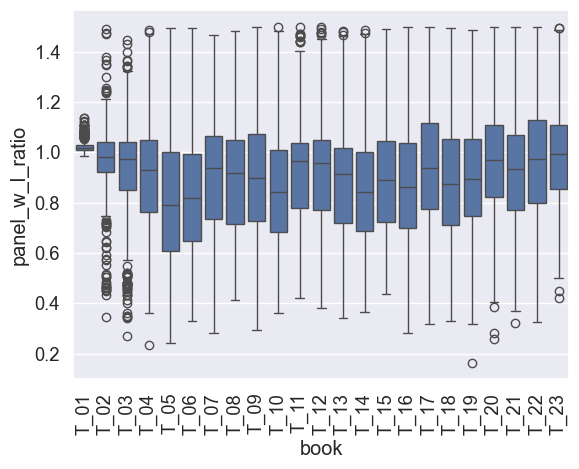

In [218]:
g = sns.boxplot(x=df_all["book"], y=df_all[df_all["panel_w_l_ratio"] < 1.5]["panel_w_l_ratio"])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

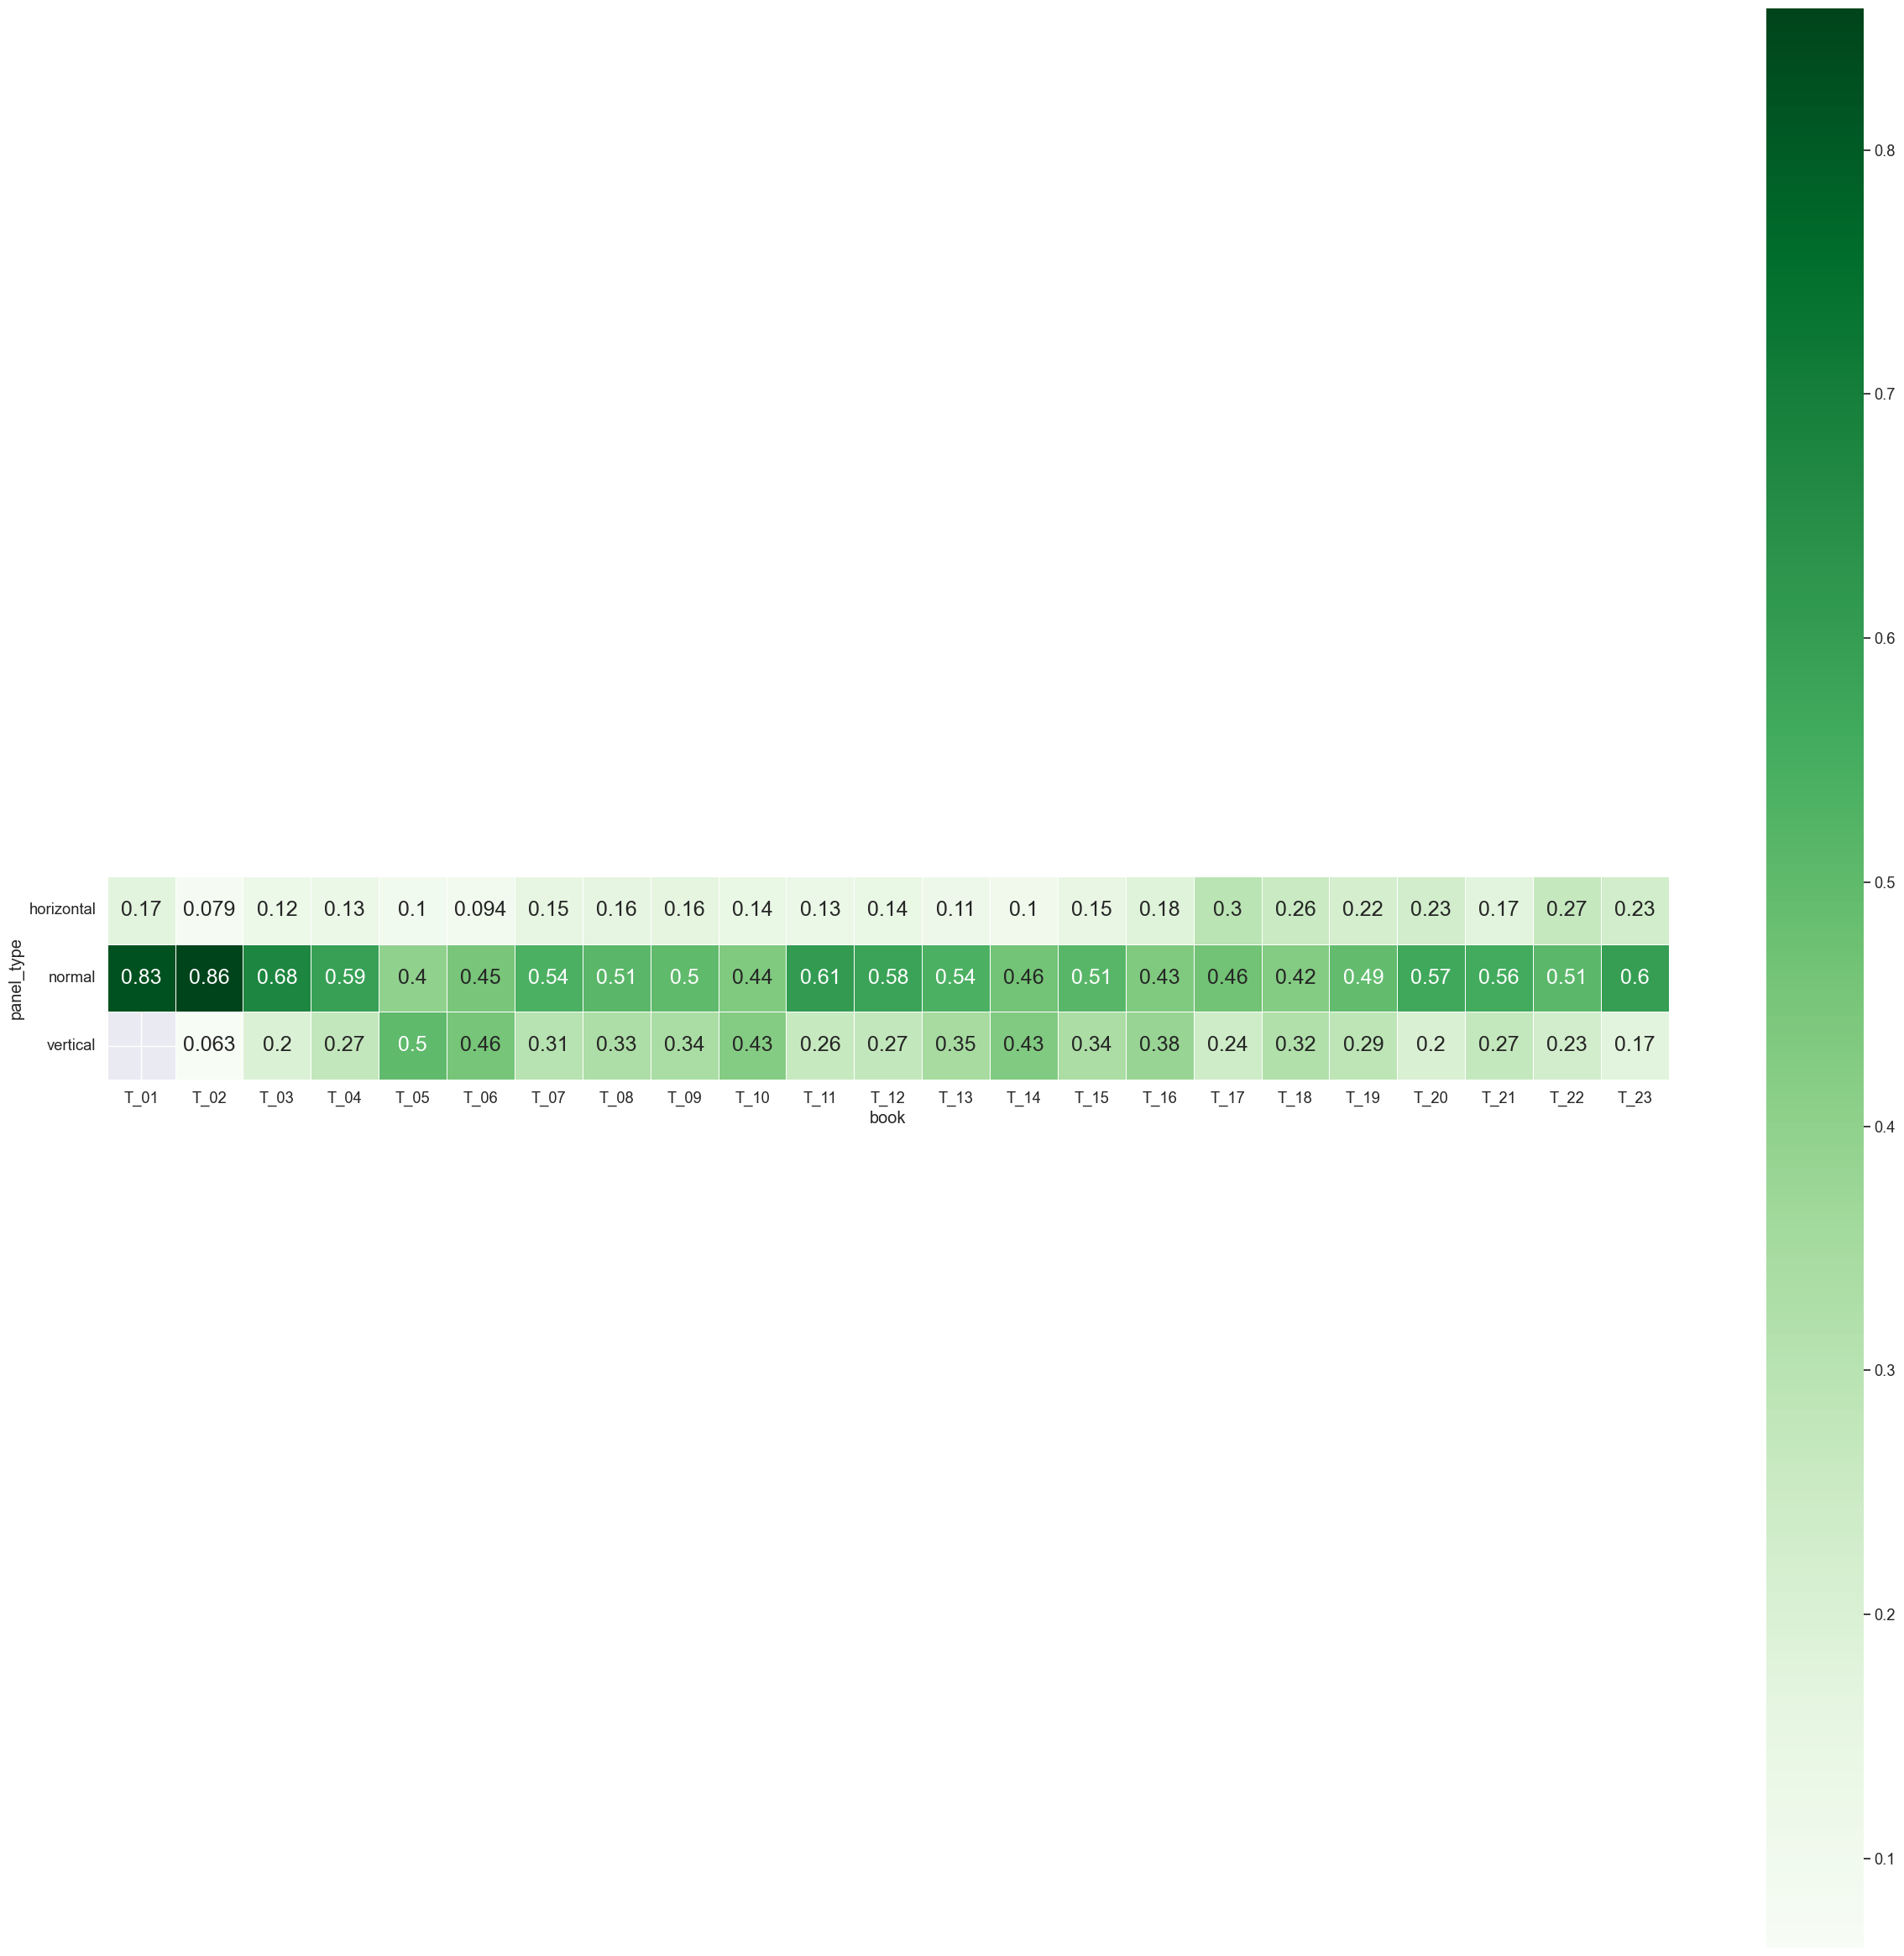

In [214]:
panel_types = pd.pivot_table(df_all[df_all['panel_type'] != "NaN"], values='panel_area', index=['panel_type'], columns=['book'], aggfunc="count")

panel_types = panel_types / panel_types.sum(axis=0)

plt.figure(figsize=(30, 30))
sns.set(font_scale = 1.2)
sns_plot = sns.heatmap(panel_types, annot=True, linewidths = 0.5, annot_kws={"size": 18}, cmap="Greens", square=True)
plt.yticks(rotation=0)
fig = sns_plot.get_figure()



In [182]:
df_all['panel_width_length_ratio'].mean()

0.991593208401225

In [183]:
df_all['panel_width_length_ratio'].median()

0.9420010697601078

In [95]:
df_all[(df_all['book'] == 'T_21') & (df_all['page'] == 61)]

,book,page,img,panel_area,panel_width,panel_length,panel_size_cat,panel_width_length_ratio
15869,T_21,61,ROI_913.png,382080,640,597,anan,1.072027
15870,T_21,61,ROI_914.png,362976,608,597,anan,1.018425
15871,T_21,61,ROI_915.png,139080,570,244,anan,2.336066
15872,T_21,61,ROI_916.png,191520,570,336,anan,1.696429
15873,T_21,61,ROI_917.png,507952,848,599,anan,1.415693
15874,T_21,61,ROI_918.png,278332,467,596,anan,0.783557
15875,T_21,61,ROI_919.png,296808,498,596,anan,0.835570
15876,T_21,61,ROI_920.png,303364,509,596,anan,0.854027
15877,T_21,61,ROI_921.png,378460,635,596,anan,1.065436
15878,T_21,61,ROI_922.png,405000,675,600,anan,1.125000


In [181]:
(df_all.groupby('book').panel_area.count() / 62)

book
T_02    10.677419
T_03    11.612903
T_04    12.725806
T_05    14.403226
T_06    14.274194
T_07    12.435484
T_08    11.370968
T_09    11.693548
T_10    13.241935
T_11    11.903226
T_12    12.193548
T_13    12.629032
T_14    13.596774
T_15    14.096774
T_16    13.419355
T_17    12.419355
T_18    14.629032
T_19    13.419355
T_20    12.596774
T_21    12.983871
T_22    12.758065
T_23    12.129032
Name: panel_area, dtype: float64

In [177]:
(df_all.groupby('book').panel_area.count()).sum() / (21*62 + 63)

12.772893772893774

In [224]:
df_all

,book,page,img,panel_area,panel_width,panel_length,panel_size_cat,panel_type,panel_w_l_ratio
0,T_01,1,ROI_0.png,261626,514,509,M,normal,1.009823
1,T_01,1,ROI_1.png,260091,513,507,M,normal,1.011834
2,T_01,1,ROI_2.png,260084,514,506,M,normal,1.015810
3,T_01,1,ROI_3.png,258064,508,508,M,normal,1.000000
4,T_01,1,ROI_4.png,262144,512,512,M,normal,1.000000
...,...,...,...,...,...,...,...,...,...
18141,T_23,62,ROI_872.png,349256,596,586,M,normal,1.017065
18142,T_23,62,ROI_873.png,463730,790,587,L,horizontal,1.345826
18143,T_23,62,ROI_874.png,264177,447,591,M,vertical,0.756345
18144,T_23,62,ROI_875.png,555888,939,592,L,horizontal,1.586149


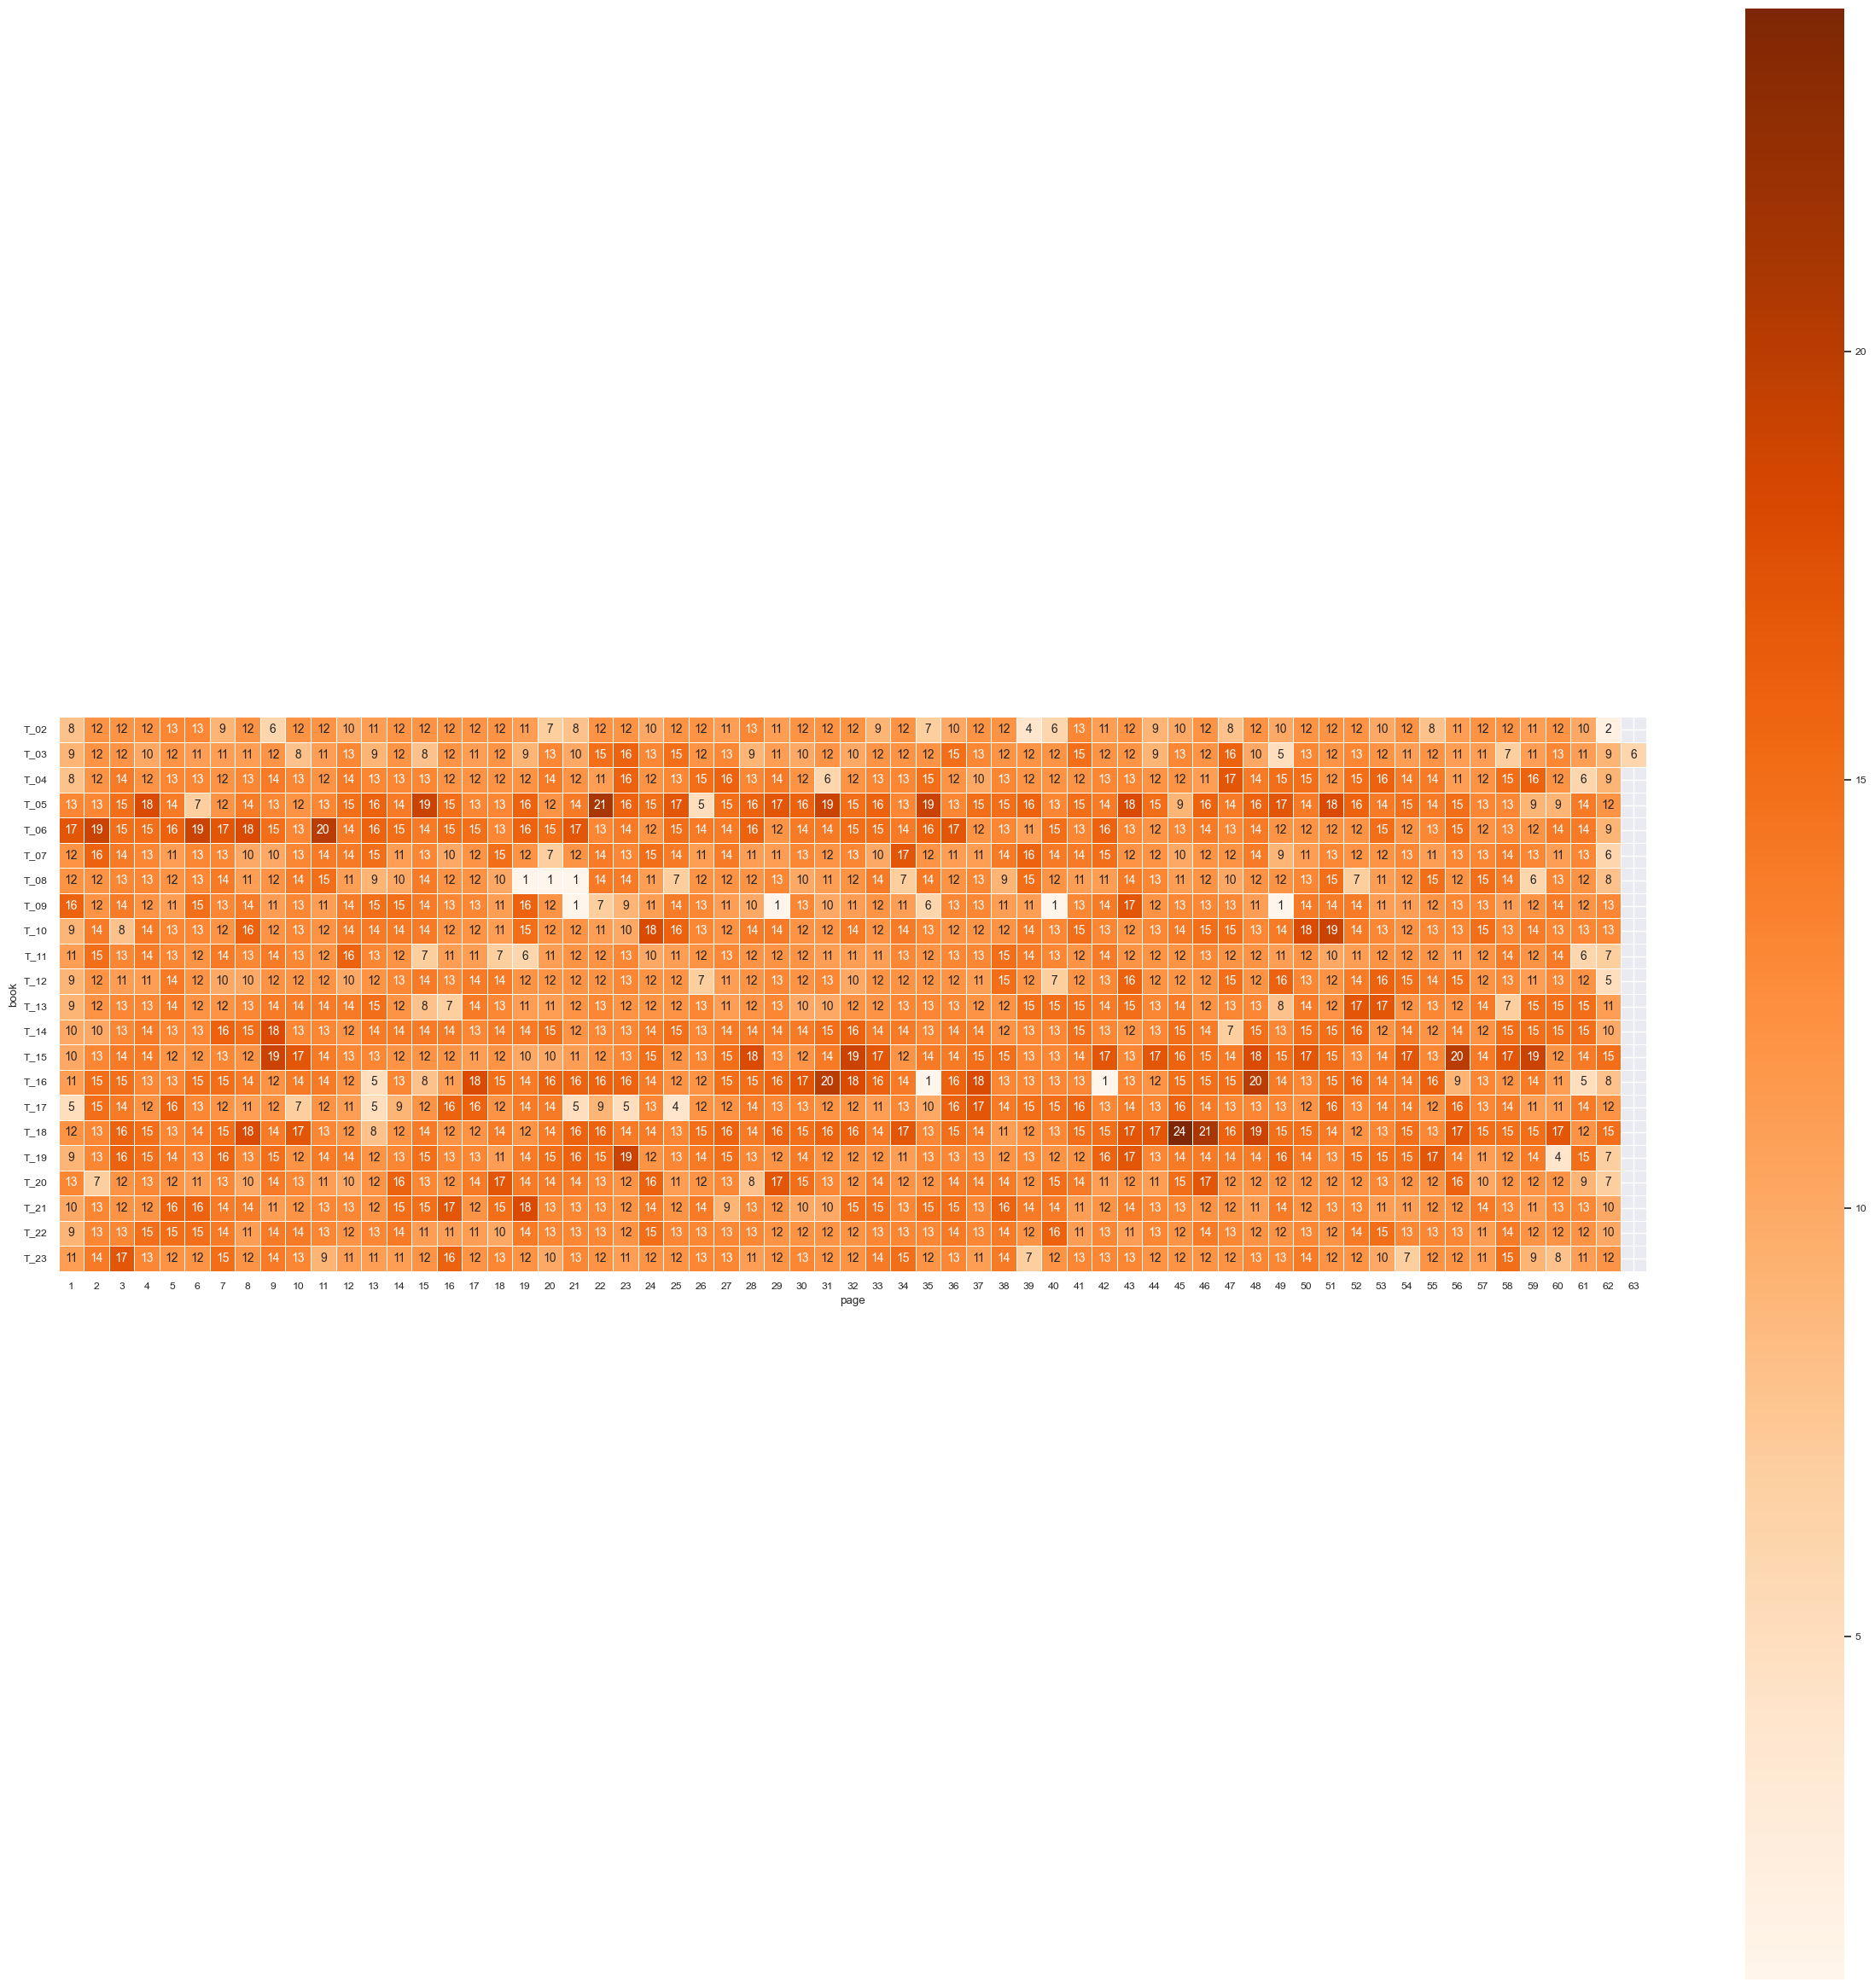

In [225]:
panel_count_page = pd.pivot_table(df_all[df_all['book'] != 'T_01'], values='panel_area', index=['book'], columns=['page'], aggfunc="count")

plt.figure(figsize=(30, 30))
sns.set(font_scale = 0.8)
sns_plot = sns.heatmap(panel_count_page, annot=True, linewidths = 0.5, annot_kws={"size": 10}, cmap="Oranges", square=True)
plt.yticks(rotation=0)
fig = sns_plot.get_figure()